# Learning Curves


🎯 This exercise consists of using Learning Curves to diagnose the performance of a model in regards to **bias** and **variance**, as well as spotting and correcting **underfitting** and **overfitting**.

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('NBA.csv')

data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Cross-Validation

❓ Cross validate a Linear Regression model meant to predict player win rating according to minutes played (`mp`). Save the mean of the scores as `cv_score`.

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

x = data[['mp']]
y = data['win_rating']

cv_results = cross_validate(model, x, y, cv = 5)

In [6]:
cv_score = cv_results['test_score'].mean()
cv_score

0.556730180006891

## 2. Learning Curves

Learning curves are used to diagnose the performance of the model in more depth.
 
❓ Plot the learning curves of the model ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)). 

For the training sizes, you should start with **100** rows and increment by **100** until 80% of the dataset is used in training (**3200**). Hence, you should end up with **32** slices. [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) can help!

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [8]:
X = data[['mp']]
y = data['win_rating']

(0.0, 1.0)

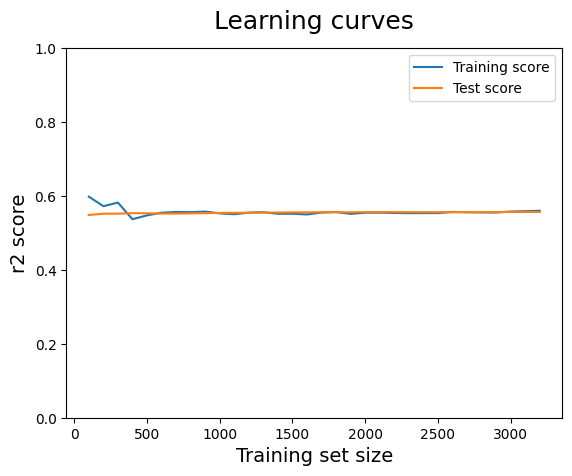

In [9]:
train_sizes = np.arange(100, 3200+100, 100)


# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0, 1)

We are observing **underfitting**

👉 The curves should have converged at a low score (be conscious of the scale: sometimes they look far apart, but their score is very close! You can try changing <code>plt.ylim()</code> to have a clearer view)
- Training score has gone down substantially training size increased
- Testing score has barely gone up - less than 1%! - even with 80% of the dataset being taken for training.

👉 There are two typical reasons that cause underfitting:
- The model is **too simple** to learn the patterns of the data
- The model needs **more features** to get better at predicting player win rating

## 3. Adding Features

So far, as we saw the model performance doesn't seem optimal. We can try fixing it by adding more features - let's go with the ones our NBA fantasty league friend suggested!

❓ Cross validate a model made to predict player win rating with:
- Minutes played (`mp`)
- Possessions (`poss`)
- Defense/offense ratio (`do_ratio`)
- Pacing

Save the new cross-validated score under a variable named `score_added_features`.

In [10]:
data_features = pd.DataFrame()

data_features['poss'] = data['poss']
data_features['mp'] = data['mp']
data_features['do_ratio'] = data['do_ratio']
data_features['pacing'] = data['pacing']

data_features

,poss,mp,do_ratio,pacing
0,4847,2409,-1.546275,-0.599918
1,5582,2708,0.996587,0.531888
2,4976,2407,0.242598,0.127976
3,1178,585,-1.343806,-1.201034
4,4534,2056,-1.813990,-0.128997
...,...,...,...,...
3995,1224,565,-1.761425,-0.011698
3996,3564,1785,0.907199,-0.125856
3997,706,378,0.848178,0.694183
3998,289,156,-6.298906,0.205844


In [11]:
model = LinearRegression()

x = data_features
y = data['win_rating']

cv_results = cross_validate(model, x, y, cv = 5)

score_added_features = cv_results['test_score'].mean()

score_added_features

0.6321354129549309

ℹ️ The performance of the model should have increased! Adding features provides the model with additional information from which to learn and with which to model the pattern of the data.

## 4. Learning Curves 2

❓ Plot the learning curves of the new model to evaluate its performance further (you can play with [plt.ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) to make the curves more obvious)

In [12]:
X = data_features[['mp']] # mp poss do_ratio pacing
y = data['win_rating']

(0.5, 0.6)

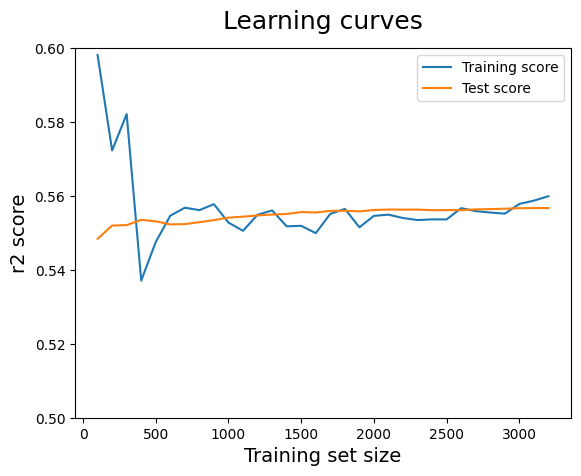

In [13]:
train_sizes = np.arange(100, 3200+100, 100)


# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5, 0.6)

 There's an improvement, but there still appears to be some **underfitting**

👉 The curves should have converged, but the training score still drops substantially more than the testing score increases.

👉 Adding more features helped a little, but didn't fully solve the underfitting problem. So we can look into the other typical case:
- The model is **too simple** to learn the patterns of the data


## 5. Improving Linear Model Fit with Polynomial Features

We've done the best we could with the features from our dataset, but we're still seeing some signs of underfitting.

It might be that relying on linear combinations of features makes our model **too simple** for the relationship between win rating and the features of players - we can try to fix that with some **feature engineering**. 🛠️

🔍 Most of our ability to explain/predict player win rating has come from the minutes played (`mp`) feature. Let's look into this feature more.

👇 Plot a scatterplot of the relationship between these two columns. Feel free to use seaborn or matplotlib.

<Axes: xlabel='mp', ylabel='win_rating'>

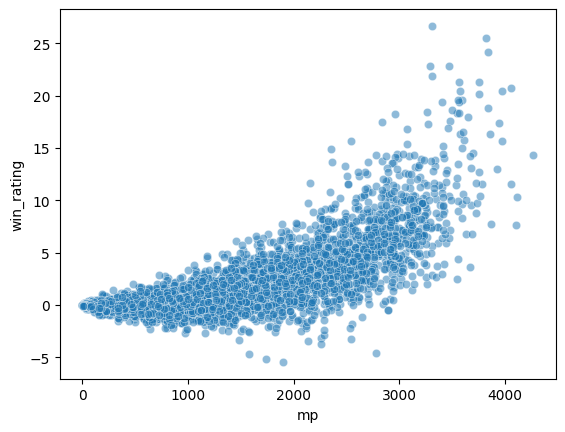

In [14]:
import seaborn as sns

df = data

sns.scatterplot(data=df, x='mp', y='win_rating', alpha=0.5)

🎯 Let's train a `LinearRegression` model with `mp` and `win_rating` with a **holdout**.

👇 Let's plot the learned regression line on the same plot to see how well it fits the data. Remember, you can extract the coefficients of a trained linear model with `coef_` and `intercept_`

Model R2: 0.5441185829799919


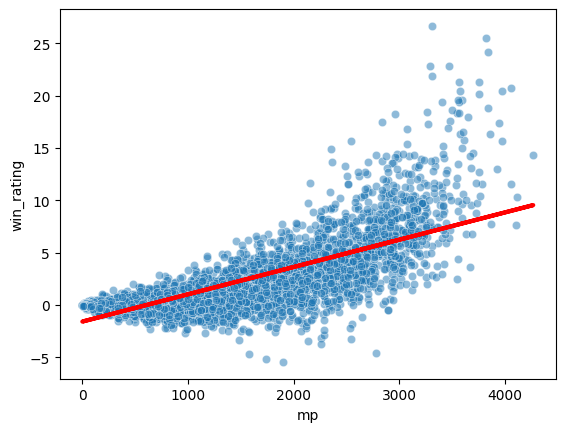

In [15]:
from sklearn.model_selection import train_test_split

# training the model
model = LinearRegression()

X = df[['mp']]
y = df['win_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

# scoring the model
lin_reg_score = model.score(X_test, y_test)
print("Model R2:", lin_reg_score)

# extracting the coefficients and regression function
regression = model.coef_[0] * df['mp'] + model.intercept_

# plotting the data and learned regression function
sns.scatterplot(data=df, x='mp', y='win_rating', alpha=0.5)
plt.plot(df['mp'], regression, color='red', linewidth=3)

In [16]:
model.coef_

array([0.00260549])

In [17]:
model.intercept_

-1.5752851652794035

❓ Do you see what could be causing our model to underfit?

It looks like we're trying to fit a straight line learned by the Linear Regression model on data that is distributed *curvilinearly*.


We can try improving the model by adding [**Polynomial Features**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures).

Polynomial features are products of existing features of a set degree. For example, if we have two features - `a` and `b` - and we add degree-2 polynomial features, we'd end up with a feature set of [`a`, `b`, `a`$^2$, `a` $*$ `b`, `b`$^2$].

Thanks to the exponents created by sklearn's `PolynomialFeatures`, we can train a model to closer represent curvilinear relationships, like the one observed between players' win ratings and minutes played.

Let's try it! 🚀

👇 Let's update our feature set `X` with degree-2 polynomial features. Check the [example in the sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#Examples:~:text=linear_model/plot_polynomial_interpolation.py-,Examples,-%3E%3E%3E) to see how to transform the data - the first example below is on us 😉

In [20]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2, include_bias=False) # we don't want to add a column of 1's
X_poly = polynomial_features.fit_transform(X)

X_poly = pd.DataFrame(X_poly) # turning it back into a DataFrame for easier manipulation
X_poly.head()

,0,1
0,2409.0,5803281.0
1,2708.0,7333264.0
2,2407.0,5793649.0
3,585.0,342225.0
4,2056.0,4227136.0


☝️ Note that column names disappeared due to the transformation - feel free to update them, or just keep in mind that the first column is our original `mp` and the new column - `mp`$^2$.

In [21]:
X_poly.rename(columns = {0 : 'mp', 1 : 'mp2'})

,mp,mp2
0,2409.0,5803281.0
1,2708.0,7333264.0
2,2407.0,5793649.0
3,585.0,342225.0
4,2056.0,4227136.0
...,...,...
3995,565.0,319225.0
3996,1785.0,3186225.0
3997,378.0,142884.0
3998,156.0,24336.0


🎯 Let's check if adding a `degree=2` polynomial feature helps the model better represent the relationship between minutes played and a player's win rating.

👇 Run the cell below to see the new regression line, created by a model trained on degree-2 polynomial features, meaning `mp` and `mp`$^2$. 

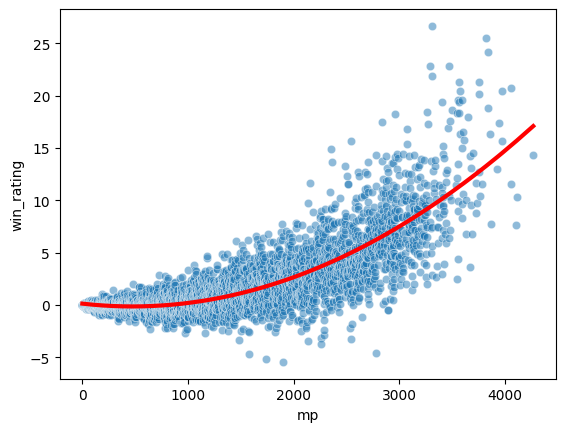

In [22]:
sorted_df = df.sort_values('mp')

X = sorted_df[['mp']]
y = sorted_df['win_rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model.fit(X_poly, y)

predictions = model.predict(X_poly)

sns.scatterplot(x=X['mp'], y=y, alpha=0.5)
plt.plot(X['mp'], predictions, linewidth=3, color='r')

💡 The new regression line seems to be a better fit for our data - we're on the right track!

## 6. Picking the best number of degrees

🔢 Let's go back to our **full feature set** - `['mp', 'poss', 'do_ratio', 'pacing']`


We've seen that Polynomial Features on `mp` improves the model, but how about the rest of the dataset? 🤔

❓ Cross-validate a model trained on `degree=2` polynomial features of the whole dataset. How does the score change from previous models?

In [23]:
data_features

,poss,mp,do_ratio,pacing
0,4847,2409,-1.546275,-0.599918
1,5582,2708,0.996587,0.531888
2,4976,2407,0.242598,0.127976
3,1178,585,-1.343806,-1.201034
4,4534,2056,-1.813990,-0.128997
...,...,...,...,...
3995,1224,565,-1.761425,-0.011698
3996,3564,1785,0.907199,-0.125856
3997,706,378,0.848178,0.694183
3998,289,156,-6.298906,0.205844


In [24]:
X = data_features
y = data['win_rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model.fit(X_poly, y)

cv_results = cross_validate(model, X_poly, y, cv = 5)

score_added_features = cv_results['test_score'].mean()

score_added_features

0.8697420123126521

The model score should have improved substantially! But how do we know if `degree=2` is the best one, and not 3, or 5, or 10...? Giving our model more degrees of freedom should only make the model better, right? 🤔

❓ Do cross-validation with `degree` of polynomial features ranging from **1** to **10**. Save all the scores, then plot them with their respective degrees to pinpoint the best result.

🕰️ **NOTE:** it will take a while to run the full loop, as higher number of polynomial degrees creates exponentially more features. 

❓ While it runs, think about how many features in total will your dataset have with `degree=10`?

</br>

For every feature you will create 10 new features of varying powers, that's **44** features already. Then products of all possible combinations of features are added - resulting in **1000** features.

In [25]:
degree = np.arange(1,11)
score_added_features_degree = []

In [26]:
for i in degree:
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    model.fit(X_poly, y)

    cv_results = cross_validate(model, X_poly, y, cv = 5)

    score_added_features = cv_results['test_score'].mean()

    score_added_features_degree.append(score_added_features)
    
print(score_added_features_degree)



[0.6321354129549309, 0.8697420123126521, 0.8686652851998307, 0.8539582775919052, 0.8249942211024626, 0.7787925125101696, 0.723565420426412, 0.6360644161984855, 0.5115316228354447, 0.324653744360071]


(-1.0, 1.0)

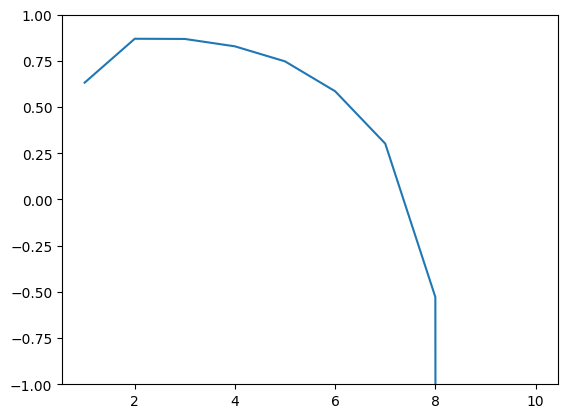

In [115]:
plt.plot(degree, score_added_features_degree)
plt.ylim(-1,1)

❓ Which polynomial feature degree is best suited to predict NBA players' win rating?

<br/>  
    
☝️ We can see that `degree=2` does give us the best score - now up to **0.87** after adding back the rest of the features!

😱 But what happens after `degree=5` - with *even more* information the model results start going down??

👇 Plot the learning curves of a model with `degree=5` polynomial features to try and pinpoint the problem.

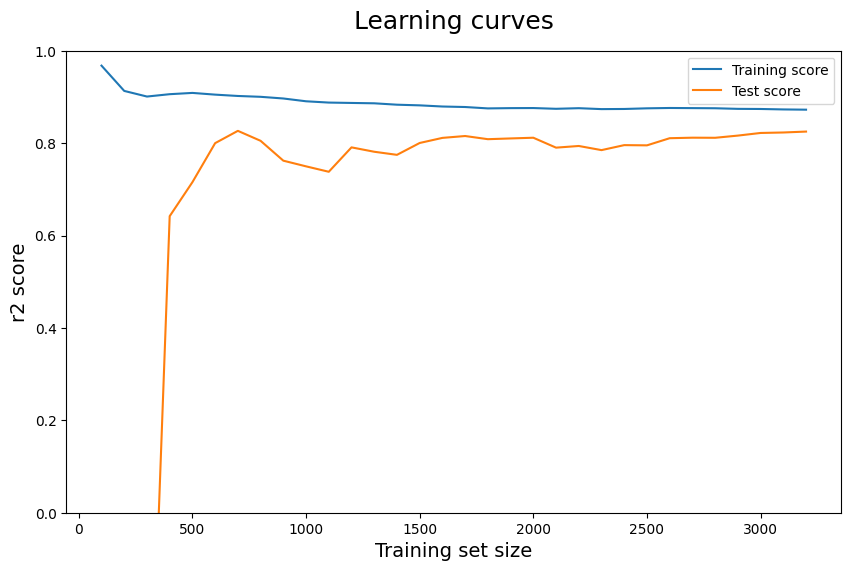

In [28]:
# Transform our X to include polynomial features
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator = LinearRegression(),
    X = X_poly, 
    y = y, 
    train_sizes = train_sizes, 
    cv = 5
)

# Take the mean of cross-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend();

❓ How would you interpret these learning curves?


We see obvious **overfitting**!
    
👉 The curves don't converge, the model is overfitting the training data with a training score (`~0.9`) that stays substantially higher than the testing score (`~0.8`).
    
👉 By adding degree-5 polynomial features, there appears too much "noise" that the model pays attention to and the learned coefficients do not represent reality any more.
    
</details>

## 7. Reducing Training Set Size

🎯 Now that we've found the best model score we could get, let's see if we can afford to train the model on less of data to save computation resources.

👇 Let's plot the learning curves of our best model - all features with `degree=2` polynomial.

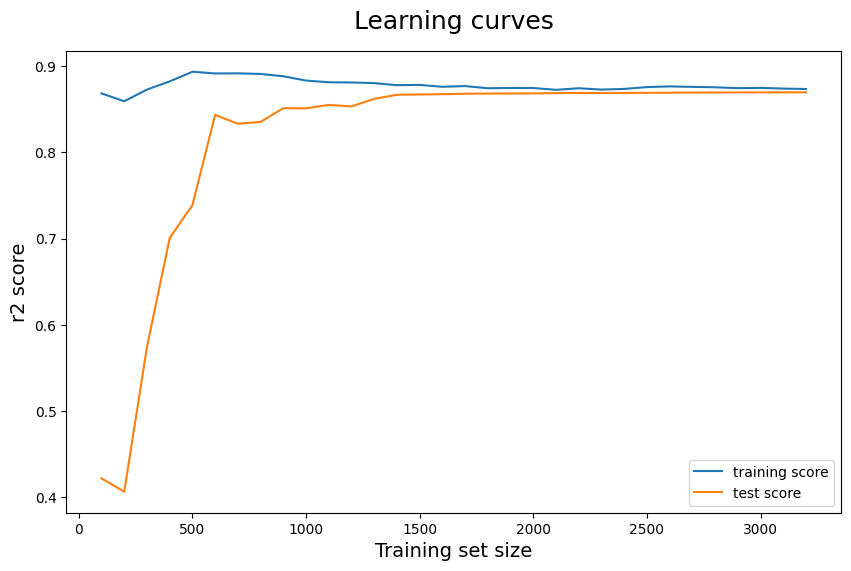

In [29]:
# create the training size slices
train_sizes = np.linspace(100, 3200, 32, dtype='int')

X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LinearRegression(),
                                                              X = X_poly, 
                                                              y = y, 
                                                              train_sizes = train_sizes, 
                                                              cv = 5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

❓Looking at the new learning curves, how many training examples are sufficient for the model to learn the patterns of the dataset?

👇 Run the cell below after you've come up with the answer to check

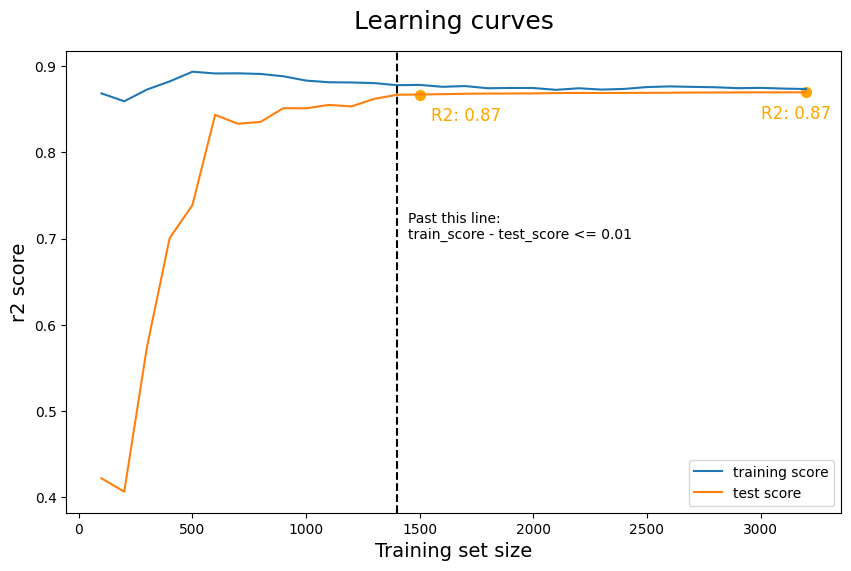

In [30]:
# Plotting the learning curves
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)

# Plotting a line where difference of train and test score becomes <1%
plt.axvline(1400, linestyle='--', c='black')
plt.annotate('Past this line:\ntrain_score - test_score <= 0.01', xy=(1450, 0.7))


# Comparing test scores at that line and at max training data (80% of data)
plt.scatter(train_sizes[14], test_scores_mean[14], c='orange', s=50)
plt.annotate(f"R2: {round(test_scores_mean[14],2)}",
             xy=(train_sizes[14] + 50, test_scores_mean[14] - 0.03),
             fontsize=12, c='orange')

plt.scatter(train_sizes[31], test_scores_mean[31], c='orange', s=50)
plt.annotate(f"R2: {round(test_scores_mean[31],2)}",
             xy=(train_sizes[31] - 200, test_scores_mean[31] - 0.03),
             fontsize=12, c='orange')


plt.legend();

ℹ️ The more data, the longer the training. In certain cases, you will be working with enormous datasets. In those situations, the learning curves can help you find the right trade-off between reducing the training size (and training time!) while maintaining a high-performing model.

The score at `train_size=1500` is nearly the same as with the full dataset! On the other hand, you could have reduced the computational expense - imagine saving 60% of a 1TB dataset!

## 8. Comparing Model Predictions

👇 We've seen the evolution of $R^2$ score of our models, but let's see **how accurately the models predict**.

❓ Calculate the MSE - *Mean Squared Error* (mean of `predictions - target`) - for two models trained on the **full** dataset:

1. A model trained on all the features - `mp`, `poss`, pacing and a player's defense/offense ratio
2. A model trained with `degree=2` polynomial features

❓ Save the resulting MSE's into variables called `reg_score` and `poly_score` respectively

In [31]:
### 1st Model ###

# preparing the features and target
X = df[['mp', 'poss', 'do_ratio', 'pacing']]
y = df.win_rating

# instantiating a linear regression model
model = LinearRegression()

# fitting the model
model.fit(X, y)

# calculating the MSE
reg_score = np.mean((model.predict(X) - y) ** 2)
print("Regular model MSE:", round(reg_score, 2))


Regular model MSE: 4.36


In [32]:
### 2nd Model ###

# preparing the features and target
X = df[['mp', 'poss', 'do_ratio', 'pacing']]
y = df.win_rating

# transforming the features with degree-3 polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# instantiating a linear regression model
model = LinearRegression()

# fitting the model
model.fit(X_poly, y)

# calculating the MSE
poly_score = np.mean((model.predict(X_poly) - y) ** 2)
print("Degree-2 polynomial feature model MSE", round(poly_score, 2))

Degree-2 polynomial feature model MSE 1.53


**The Degree-2 polynomial feature model is around 3 times more efficient thant the linear model.**

END OF THE NOTEBOOK 2/2